### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук

#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Стелина Петрити
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 10

1. Predict Students’ Dropout and Academic Success
2. Название файла: data.csv
3. Ссылка: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+
academic+success

###1. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. Набор данных задан ссылкой на страницу набора данных и названием файла с данными, который доступен из папки с данными (data folder).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
#Загрузите CSV-файл после загрузки по ссылке
path = '/content/drive/MyDrive/viti 4/Data mining/data.csv'
data = pd.read_csv(path, delimiter=';')
#Отобразить первые несколько строк фрейма данных
print(data.head())


   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [ ]:
# Получить количество строк и столбцов
rows, columns = data.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')
print(data.to_numpy())

Number of rows: 4424
Number of columns: 37
[[1 17 5 ... 1.4 1.74 'Dropout']
 [1 15 1 ... -0.3 0.79 'Graduate']
 [1 1 5 ... 1.4 1.74 'Dropout']
 ...
 [1 1 1 ... -0.3 0.79 'Dropout']
 [1 1 1 ... -0.8 -3.12 'Graduate']
 [1 10 1 ... 3.7 -1.7 'Graduate']]


### 2. Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями признаков.


In [ ]:
print("Initial data types:")
print(data.dtypes)

Initial data types:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             

Bсе числовые объекты уже правильно классифицированы.

In [ ]:
# Проверьте, нет ли пропущенных значений в числовых столбцах
missing_values = data.select_dtypes(include=['float64', 'int64', 'object']).isnull().sum()
# Отобразить количество пропущенных значений для каждого числового столбца
print("Missing values in numerical features:")
print(missing_values[missing_values > 0])

Missing values in numerical features:
Series([], dtype: int64)


In [ ]:
import numpy as np
data = data.replace('?', np.NaN) # заменим '?' на np.NaN

Пропущенных значений нет, поэтому нет необходимости выполнять этап заполнения пропущенных значений медианой.

### 3. Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните дискретизацию этого столбца, перейдя к 4-5 диапазонам значений.


In [ ]:
# Выберите столбец, который хотите проверить
column_check = 'Curricular units 2nd sem (approved)' # Замените на название столбца, который хотите проверить

# Просмотрите уникальные значения в выбранном столбце
uni_val = data[column_check].unique()
print(f"Уникальные значения в '{column_check}':", uni_val)

# Просмотрите первые строки выбранного столбца
print(data[[column_check]].head())


Уникальные значения в 'Curricular units 2nd sem (approved)': [ 0  6  5  8  2  7  4  1  3 10 13 11 19  9 12 17 14 20 16 18]
   Curricular units 2nd sem (approved)
0                                    0
1                                    6
2                                    0
3                                    5
4                                    6


In [ ]:
num_uni = data['Curricular units 2nd sem (approved)'].nunique()
print(num_uni)

20


In [ ]:
# Проверьте количество уникальных значений
num_uni = data[column_check].nunique()
if num_uni > 10:
    # Разделите столбец на 4 ячейки
    data['Curricular units 2nd sem(approved)_binned'] = pd.cut(data[column_check], bins=4,)
    print(data[[column_check, 'Curricular units 2nd sem(approved)_binned']].head())

   Curricular units 2nd sem (approved)  \
0                                    0   
1                                    6   
2                                    0   
3                                    5   
4                                    6   

  Curricular units 2nd sem(approved)_binned  
0                              (-0.02, 5.0]  
1                               (5.0, 10.0]  
2                              (-0.02, 5.0]  
3                              (-0.02, 5.0]  
4                               (5.0, 10.0]  


### 4. При помощи класса SelectKBest библиотеки scikit-learn найдите в наборе два признака, имеющих наиболее выраженную взаимосвязь с (дискретизированным) столбцом с меткой класса (откликом). Используйте для параметра score_func значения chi2 или f_classif.

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

# Выберите и дискретизируйте целевой столбец
column_check = 'Curricular units 2nd sem (approved)'
uni_val = data[column_check].unique()
data[column_check + '_binned'] = pd.cut(data[column_check], bins=4, labels=False)

# Подготовьте данные
X = data.drop(columns=[column_check, column_check + '_binned'])
y = data[column_check + '_binned']

# Преобразование категориальных данных в числовые (если есть)
X = pd.get_dummies(X, drop_first=True)

# Используйте SelectKBest для выбора лучших признаков
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Получите индексы лучших признаков и их оценки
scores = selector.scores_
features = X.columns

# Создайте DataFrame для удобного отображения
scores_df = pd.DataFrame({'Feature': features, 'Score': scores})
scores_df = scores_df.sort_values(by='Score', ascending=False)

print("Оценки для каждого признака:")
print(scores_df)

# Получите два наиболее значимых признака
top_features_indices = selector.get_support(indices=True)
top_features = scores_df.iloc[top_features_indices]

print("\nДва наиболее значимых признака:")
print(top_features.head(2))


Оценки для каждого признака:
                                           Feature        Score
27             Curricular units 2nd sem (credited)  2419.634847
24             Curricular units 1st sem (approved)  1992.476759
21             Curricular units 1st sem (credited)  1669.080727
22             Curricular units 1st sem (enrolled)  1455.845903
28             Curricular units 2nd sem (enrolled)  1439.778675
36                                 Target_Graduate   630.627937
30                Curricular units 2nd sem (grade)   437.001684
25                Curricular units 1st sem (grade)   354.041167
23          Curricular units 1st sem (evaluations)   305.817304
29          Curricular units 2nd sem (evaluations)   225.588846
18                              Scholarship holder   103.567849
16                         Tuition fees up to date    85.633555
17                                          Gender    82.824454
19                               Age at enrollment    61.717479
3          

###5. Для найденных признаков и (дискретизированного) столбца с меткой класса (откликом) вычислите матрицу корреляций и визуализируйте ее в виде тепловой карты (heat map)

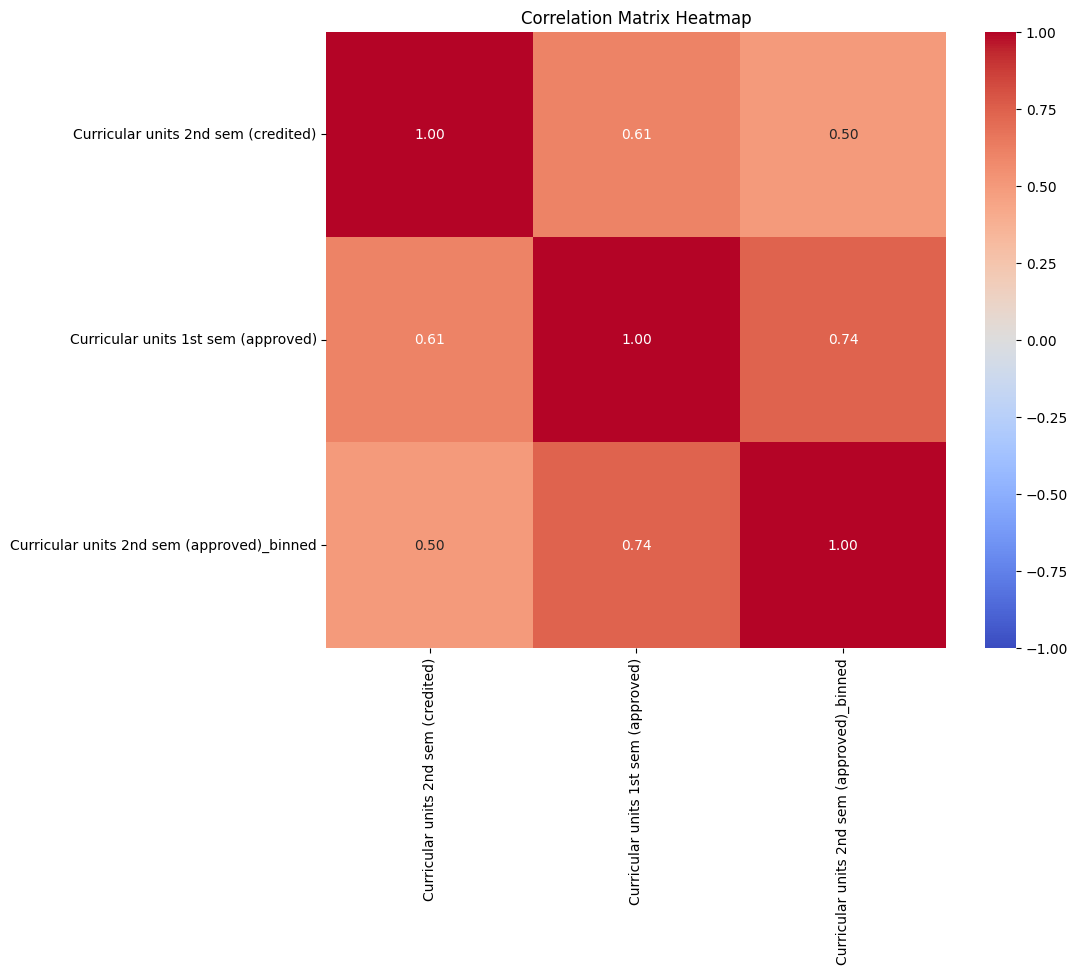

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Получите имена двух наиболее значимых признаков
top_feature_names = scores_df.head(2)['Feature'].tolist()

# Создайте DataFrame с выбранными признаками и целевым столбцом
selected_features = X[top_feature_names].copy()
selected_features[column_check + '_binned'] = y

# Вычислите корреляционную матрицу
correlation_matrix = selected_features.corr()

# Визуализируйте корреляционную матрицу как тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


###6. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

<ipython-input-156-df47a48ab9b0>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))


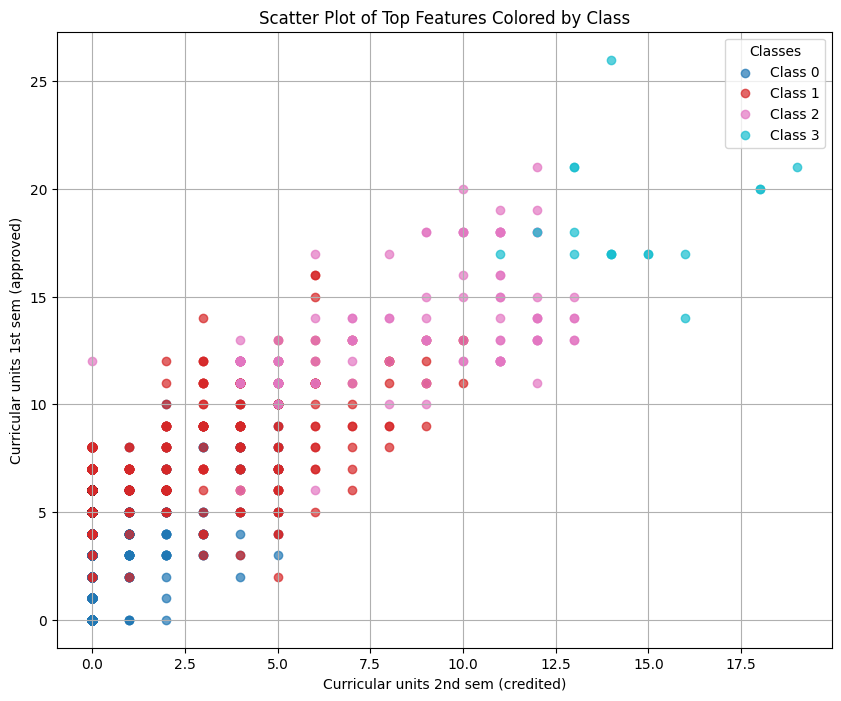

In [ ]:
import matplotlib.pyplot as plt

# Создайте DataFrame с двумя наиболее значимыми признаками и целевым столбцом
top_feature_names = scores_df.head(2)['Feature'].tolist()
selected_features = X[top_feature_names].copy()
selected_features[column_check + '_binned'] = y

# Определите уникальные значения целевого столбца для использования в легенде
classes = selected_features[column_check + '_binned'].unique()
colors = plt.cm.get_cmap('tab10', len(classes))

# Визуализируйте данные
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    subset = selected_features[selected_features[column_check + '_binned'] == class_label]
    plt.scatter(subset[top_feature_names[0]], subset[top_feature_names[1]],
                color=colors(i), label=f'Class {class_label}', alpha=0.7)

plt.xlabel(top_feature_names[0])
plt.ylabel(top_feature_names[1])
plt.title('Scatter Plot of Top Features Colored by Class')
plt.legend(title='Classes')
plt.grid(True)
plt.show()


###7. Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр n_components), для которой доля объясняемой дисперсии будет не менее 97.5%.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Оставьте только числовые признаки
nr_features = X.select_dtypes(include=['int64', 'float64'])

# Нормализуйте данные
scaler = StandardScaler()
scaled_features = scaler.fit_transform(nr_features)

# Выполните PCA
pca = PCA()
pca.fit(scaled_features)

# Найдите количество компонент, объясняющих как минимум 97.5% дисперсии
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Найдите размерность, где доля объясняемой дисперсии >= 97.5%
n_components = (cumulative_explained_variance >= 0.975).argmax() + 1

print(f"Размерность n_components для объяснения не менее 97.5% дисперсии: {n_components}")


Размерность n_components для объяснения не менее 97.5% дисперсии: 28


###8. Пользуясь методом главных компонент (PCA), снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде точек на плоскости, образованной двумя полученными признаками, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

<ipython-input-166-94203b3f2e5a>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(classes))


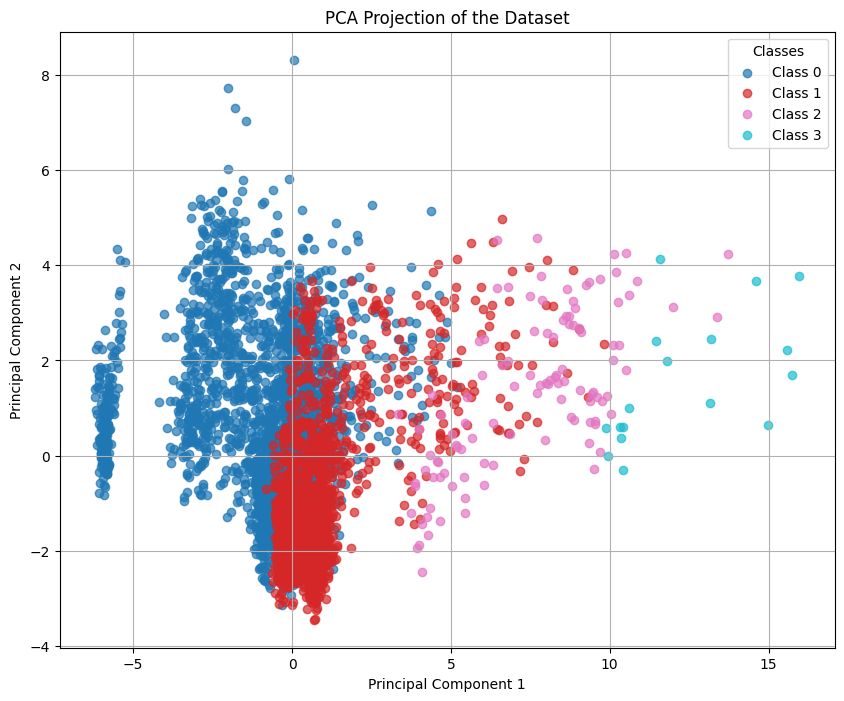

In [ ]:
# Оставьте только числовые признаки
nr_features = X.select_dtypes(include=['int64', 'float64'])

# Нормализуйте данные
scaler = StandardScaler()
scaled_features = scaler.fit_transform(nr_features)

# Выполните PCA с двумя компонентами
pca = PCA(n_components=2)
prin_comp= pca.fit_transform(scaled_features)

# Создайте DataFrame для визуализации
pca_df = pd.DataFrame(data=prin_comp, columns=['PC1', 'PC2'])
pca_df[column_check + '_binned'] = y

# Определите уникальные значения целевого столбца для использования в легенде
classes = pca_df[column_check + '_binned'].unique()
colors = plt.cm.get_cmap('tab10', len(classes))

# Визуализируйте данные
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    subset = pca_df[pca_df[column_check + '_binned'] == class_label]
    plt.scatter(subset['PC1'], subset['PC2'],
                color=colors(i), label=f'Class {class_label}', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of the Dataset')
plt.legend(title='Classes')
plt.grid(True)
plt.show()
